In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset("titanic")

In [3]:
# Univariate Analysis

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


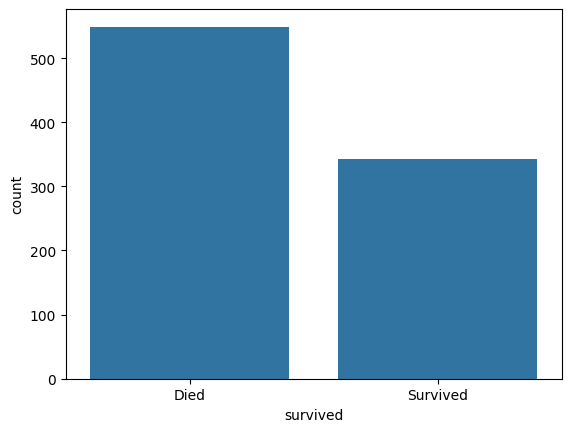

In [6]:
sns.countplot(x = "survived", data = df)
plt.xticks([0,1],["Died", "Survived"])
plt.show()

In [7]:
# More people died compared to survived

<Axes: xlabel='age', ylabel='Count'>

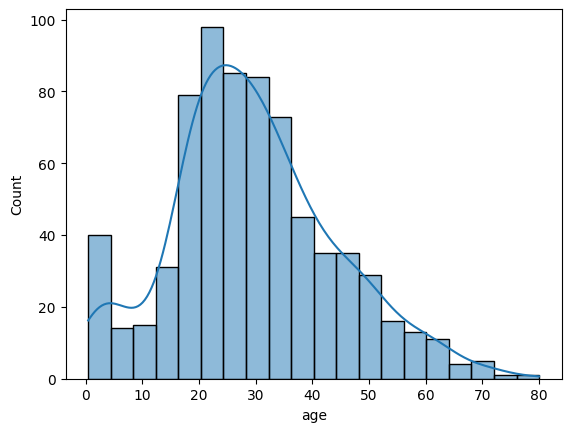

In [8]:
sns.histplot(x = df["age"].dropna(), kde =True)

In [9]:
# most passengers are young in age

<Axes: xlabel='fare', ylabel='Count'>

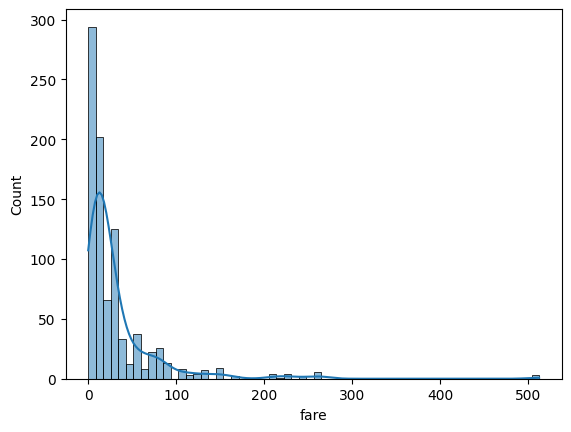

In [10]:
sns.histplot(df["fare"], kde =True)

In [27]:
# most is cheap fared people

In [12]:
# Bivariate Analysis

In [13]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [14]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

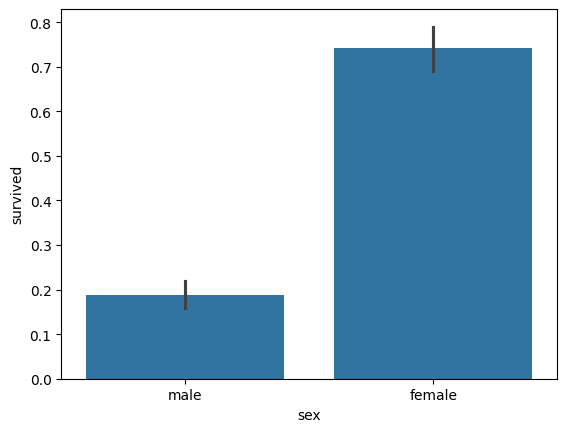

In [15]:
sns.barplot(x = df["sex"], y = df['survived'])

In [16]:
# It is possible that htere are male staff more in the ship

<Axes: xlabel='pclass', ylabel='survived'>

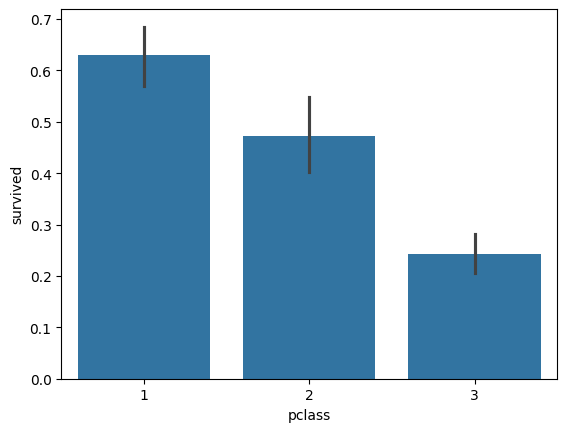

In [17]:
sns.barplot(x = df["pclass"], y = df['survived'])

<Axes: xlabel='survived', ylabel='age'>

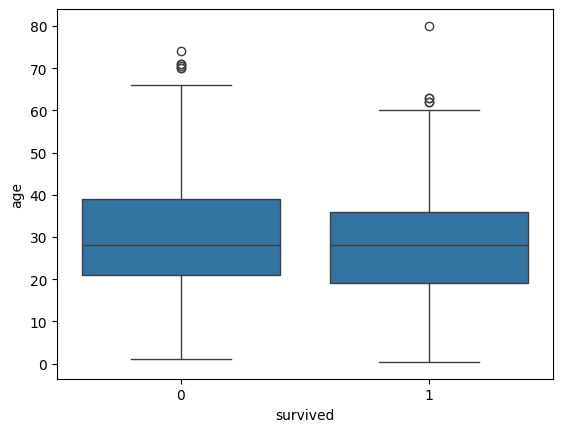

In [18]:
sns.boxplot(x = df["survived"], y = df['age'])

In [19]:
# Feature Engineering

In [20]:
df["family_size"] = df["sibsp"] + df["parch"] + 1

In [21]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,4
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


<Axes: xlabel='family_size', ylabel='survived'>

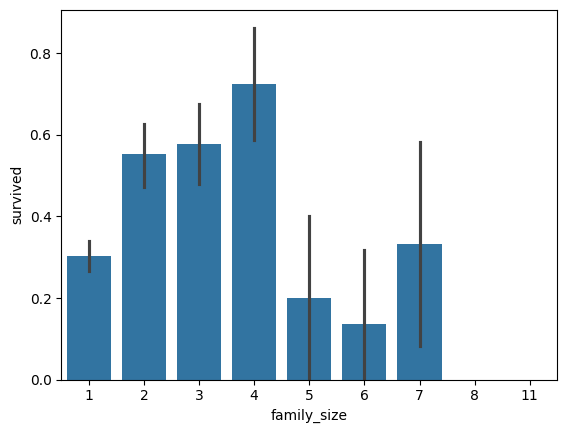

In [22]:
sns.barplot(x = df["family_size"], y = df['survived'])

In [23]:
 # Big size family may be in 3rd class

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoded_sex = pd.get_dummies(df, columns = ["sex"])

In [26]:
encoded_sex

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,True,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,True,False
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,True,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1,False,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,True,False
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,4,True,False
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,False,True
